In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import librosa
import librosa.display
import IPython.display

import tensorflow_hub as hub

from google.colab import drive

from tqdm import tqdm

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/path_train.csv')
path_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/path_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/y_test.csv')

In [ ]:
!pip install openl3
import openl3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 KB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 61.3 MB/s eta 0:00:00
  Created wheel for openl3: filename=openl3-0.4.1-py2.py3-none-any.whl size=249325522 sha256=62cd3bcb72460afd4ab6993f4fa8b14da6c78dc984a8d3e56db839eb4b5361d3
  Stored in directory: /root/.cache/pip/wheels/f3/88/93/33a947b53255468585f1d3c869811b6967f8d20e30e8e45d27
  Created wheel for kapre: filename=kapre-0.3.7-py3-none

In [ ]:
y_train.head()

,Unnamed: 0,target
0,1338,1
1,1986,0
2,1173,1
3,1040,1
4,1747,1


In [ ]:
path_train.head()

,Unnamed: 0,id,model,Datetime,point,path
0,1338,7b618637e3f9b1e7,Xiaomi Redmi Note 9 Pro | 10,2021-07-05 11:06:00,chest02,./audio_files/20210705-110639-7b618637e3f9b1e7...
1,1986,88fe162efde77c67,Xiaomi M2003J15SC | 10,2021-10-22 00:05:00,chest03,./audio_files/20211022-000528-88fe162efde77c67...
2,1173,5b6ba4b4d8e12011,Xiaomi Mi A2 | 10,2021-06-04 12:47:00,spine01,./audio_files/20210604-124756-5b6ba4b4d8e12011...
3,1040,9ba6581ed461cd5f,Xiaomi Redmi Note 9 Pro | 10,2021-05-18 10:28:00,chest04,./audio_files/20210518-102853-9ba6581ed461cd5f...
4,1747,0b2ed324d906c529,Xiaomi Redmi Note 9 Pro | 10,2021-09-10 11:12:00,chest03,./audio_files/20210910-111217-0b2ed324d906c529...


In [ ]:
path_train.shape

(1464, 6)

In [ ]:
model = keras.Sequential()
# model.add(layers.LSTM(128, return_sequences=True, input_shape=(None,6144)))
model.add(layers.LSTM(128, return_sequences=True, input_shape=(None,20)))
# model.add(layers.Dropout(0.3))
model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.Dropout(0.3))
model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.Dropout(0.3))
model.add(layers.LSTM(128))
model.add(layers.Dense(20, activation='ReLU'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=0.5)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.input_shape, model.output_shape

((None, None, 20), (None, 1))

In [ ]:
# path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[1][0].lstrip('.')
# signal,sample_rate = librosa.load(path)
# mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
# mfccs = preprocessing.scale(mfccs, axis=1)
# X_train = mfccs.T
# # model.fit(X_train, y_train.iloc[1, :].to_numpy().reshape(1,-1))
# model.fit(np.expand_dims(X_train, axis=0), y_train.loc[1], batch_size=64, epochs=10)


In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[9]['path'].lstrip('.')
# signal,sample_rate = librosa.load(path)
# # signal = np.delete(signal, np.where(signal < threshold))
# emb, ts = openl3.get_audio_embedding(signal,sample_rate)

In [ ]:
# emb.shape

In [ ]:
# emb

In [ ]:
# np.expand_dims(emb, axis=0).shape

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
y_train.loc[9, 'target']

1

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[9]['path'].lstrip('.')
signal,sample_rate = librosa.load(path)
# signal = np.delete(signal, np.where(signal < threshold))
# scaler.fit(signal.reshape(-1, 1))
# signal_ss = scaler.transform(signal.reshape(-1, 1))
mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
mfccs = preprocessing.scale(mfccs, axis=1)
X_train = mfccs.T
# emb, ts = openl3.get_audio_embedding(signal,sample_rate)
# mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
#     mfccs = preprocessing.scale(mfccs, axis=1)

model.fit(np.expand_dims(X_train, axis=0), np.expand_dims(np.array(y_train.loc[9, 'target']), axis=0), batch_size=1, epochs=1)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


1/1 [==============================] - 17s 17s/step - loss: 0.7083 - accuracy: 0.0000e+00


In [ ]:
for epoch in tqdm(range(10), total=10):
  print('epoch', epoch)
  for i, row in path_train.iterrows():
      path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[i]['path'].lstrip('.')
      signal,sample_rate = librosa.load(path)
      # signal_mean = signal.mean()
      # signal = np.delete(signal, np.where(signal < 0))
      # scaler.fit(signal.reshape(-1, 1))
      # signal_ss = scaler.transform(signal.reshape(-1, 1))
      mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
      mfccs = preprocessing.scale(mfccs, axis=1)
      X_train = mfccs.T
      # emb, ts = openl3.get_audio_embedding(signal,sample_rate)
      # mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
  #     mfccs = preprocessing.scale(mfccs, axis=1)
      print("\n\niteration  ", i, '\n\n' , path)
      model.fit(np.expand_dims(X_train, axis=0), np.expand_dims(np.array(y_train.loc[i, 'target']), axis=0), batch_size=1, epochs=1)

      # np.expand_dims(X_train, axis=0)
      

In [ ]:
y_pred = []
for i, row in path_test.iterrows():
    path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + path_test.loc[i]['path'].lstrip('.')
    signal,sample_rate = librosa.load(path)
    signal = np.delete(signal, np.where(signal < 0))
    # scaler.fit(signal.reshape(-1, 1))
    # signal_ss = scaler.transform(signal.reshape(-1, 1))
    mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
    mfccs = preprocessing.scale(mfccs, axis=1)
    X_train = mfccs.T
    # emb, ts = openl3.get_audio_embedding(signal,sample_rate)
    # mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
#     mfccs = preprocessing.scale(mfccs, axis=1)
    y_pred.append(model.predict(np.expand_dims(X_train, axis=0))[0][0])

   

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import r2_score

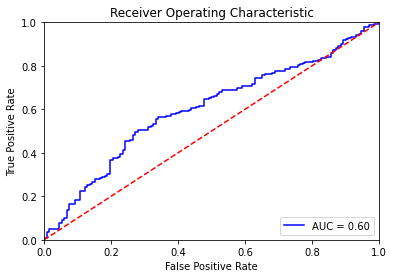

ROC AUC is 0.6002331002331003


In [30]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

print(f"ROC AUC is {roc_auc}")

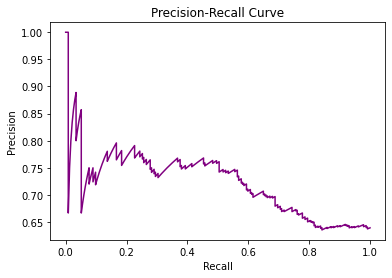

In [31]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show();

In [32]:
for value in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    idx = (np.abs(recall - value)).argmin() #index for recall
    result = np.where(precision == precision[idx]) # indexes for precision
    print(f"Precision for recall = {value} is {precision[result]}")
    print(f"Threshold for recall = {value} is {threshold[result]}")

Precision for recall = 0.1 is [0.71875 0.71875]
Threshold for recall = 0.1 is [0.9631624  0.97347236]
Precision for recall = 0.2 is [0.7704918]
Threshold for recall = 0.2 is [0.9719192]
Precision for recall = 0.3 is [0.73684211]
Threshold for recall = 0.3 is [0.97037065]
Precision for recall = 0.4 is [0.752]
Threshold for recall = 0.4 is [0.96872276]
Precision for recall = 0.5 is [0.75974026]
Threshold for recall = 0.5 is [0.9666717]
Precision for recall = 0.6 is [0.70707071]
Threshold for recall = 0.6 is [0.9620326]
Precision for recall = 0.7 is [0.67768595]
Threshold for recall = 0.7 is [0.92512745]
Precision for recall = 0.8 is [0.65156794]
Threshold for recall = 0.8 is [0.44491538]
Precision for recall = 0.9 is [0.64133739]
Threshold for recall = 0.9 is [0.173069]


In [43]:
threshold = 0.15
y_pred_final = np.where(np.array(y_pred) < threshold, 0, 1)
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.40      0.11      0.17       132
           1       0.64      0.91      0.75       234

    accuracy                           0.62       366
   macro avg       0.52      0.51      0.46       366
weighted avg       0.56      0.62      0.54       366



array([[ 14, 118],
       [ 21, 213]])

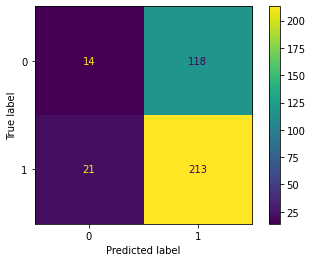

In [44]:
cm = confusion_matrix(y_test, y_pred_final)
display(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [47]:
pd.DataFrame(y_pred_final).to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_pred_final.csv")
pd.DataFrame(y_pred).to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_pred.csv")

In [56]:
fp_indices = np.where((y_pred_final.reshape(-1,1)==1)&(y_test==0))
tp_indices = np.where((y_pred_final.reshape(-1,1)==1)&(y_test==1))

In [66]:
false_pos = path_test.loc[fp_indices[0], :]

In [65]:
true_pos = path_test.loc[tp_indices[0], :]

In [63]:
path_test.loc[fp_indices[0], :].to_csv('false_pos.csv')

In [64]:
path_test.loc[tp_indices[0], :].to_csv('true_pos.csv')

In [67]:
false_pos.head()

,id,model,Datetime,point,path
0,042915863731067b,Xiaomi Redmi Note 9 Pro | 11,2021-11-01 14:09:00,spine01,./audio_files/20211101-140947-042915863731067b...
1,e70516a491f41f9d,samsung SM-A605FN | 8.0.0,2019-08-14 22:00:00,chest04,./audio_files/20190814-220020-e70516a491f41f9d...
8,7b1f8002edd19d9a,Xiaomi Mi A2 | 10,2020-03-26 11:07:00,spine01,./audio_files/20200326-110730-7b1f8002edd19d9a...
14,55515821bdf8f110,Xiaomi Redmi Note 9 Pro | 11,2021-11-01 13:54:00,chest02,./audio_files/20211101-135429-55515821bdf8f110...
15,8d2f44a674db93a2,Xiaomi Redmi Note 9 Pro | 10,2021-07-08 18:16:00,spine02,./audio_files/20210708-181651-8d2f44a674db93a2...


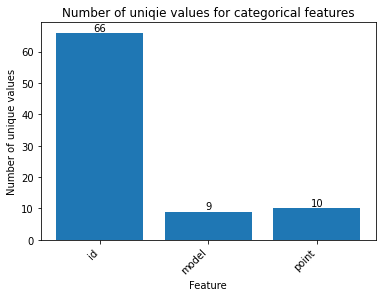

In [78]:
features = pd.DataFrame(false_pos[['id', 'model', 'point']].describe().loc['unique'])


fig, ax = plt.subplots()
bars = ax.bar(features.index, features['unique'])
ax.bar_label(bars)
plt.xlabel('Feature', )
plt.ylabel('Number of unique values')
plt.title('Number of uniqie values for categorical features')
plt.xticks(rotation=45, ha='right')
plt.show();

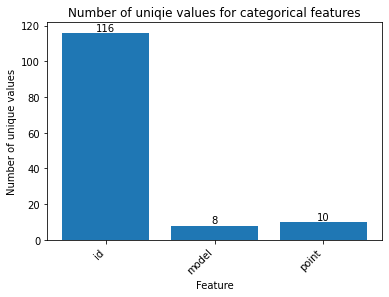

In [79]:
features1 = pd.DataFrame(true_pos[['id', 'model', 'point']].describe().loc['unique'])


fig, ax = plt.subplots()
bars = ax.bar(features1.index, features1['unique'])
ax.bar_label(bars)
plt.xlabel('Feature', )
plt.ylabel('Number of unique values')
plt.title('Number of uniqie values for categorical features')
plt.xticks(rotation=45, ha='right')
plt.show();

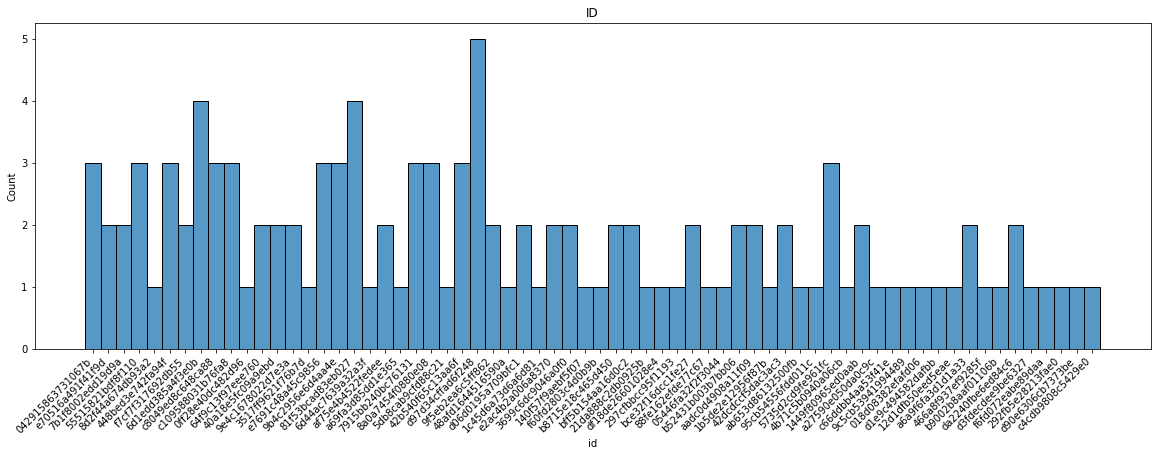

In [91]:
# define subplot grid
fig = plt.figure(figsize=(20, 6))
sns.histplot(false_pos['id'])
plt.title('ID')
ax.set_xlabel('id')
plt.xticks(rotation=45, ha='right')
plt.show();

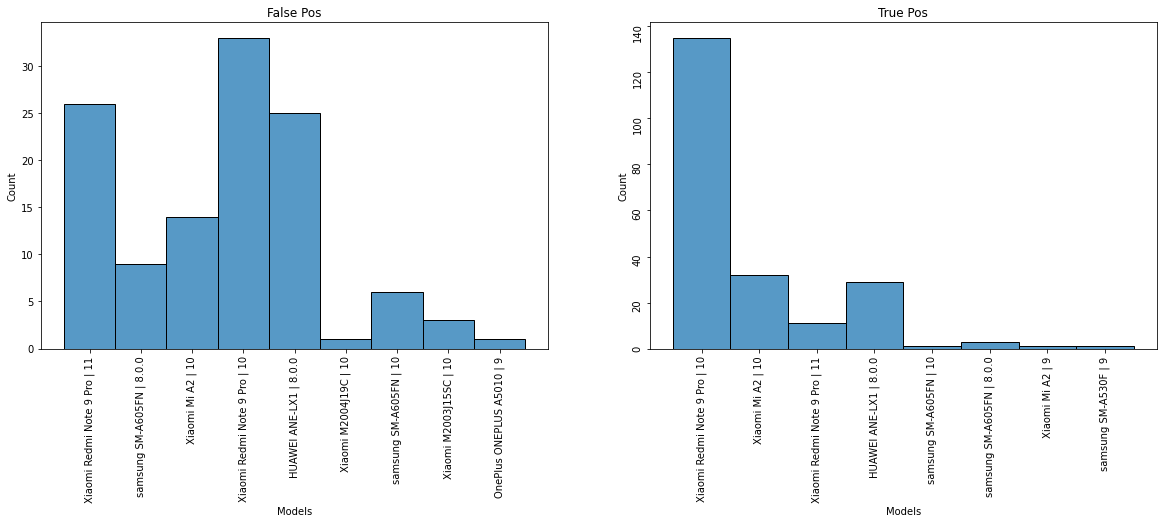

In [120]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.title("Models for FP and TP", fontsize=18, y=1)

sns.histplot(false_pos['model'], ax=ax[0])
ax[0].set_title('False Pos')
ax[0].set_xlabel('Models')
ax[0].tick_params('x', rotation=90, left=True)
sns.histplot(true_pos['model'], ax=ax[1])
ax[1].set_title('True Pos')
ax[1].set_xlabel('Models')
ax[1].tick_params(rotation=90)
plt.show();

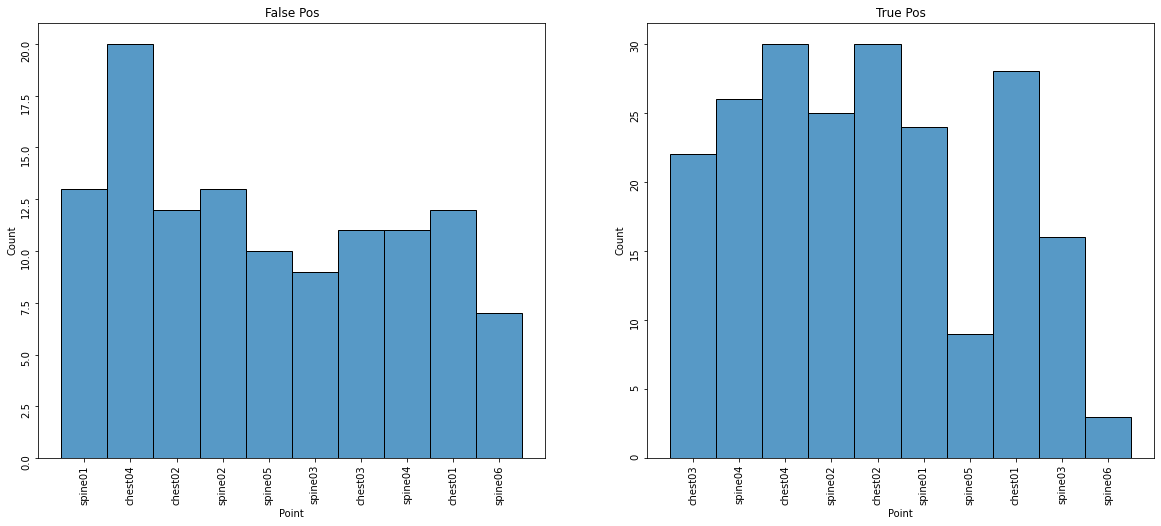

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

plt.title("Position for FP and TP", fontsize=18, y=1)

sns.histplot(false_pos['point'], ax=ax[0])
ax[0].set_title('False Pos')
ax[0].set_xlabel('Point')
ax[0].tick_params(rotation=90)
sns.histplot(true_pos['point'], ax=ax[1])
ax[1].set_title('True Pos')
ax[1].set_xlabel('Point')
ax[1].tick_params(rotation=90)
plt.show();

In [153]:
u_true, c_true = np.unique(true_pos['id'], return_counts=True)
u_false, c_false = np.unique(false_pos['id'], return_counts=True)

# Check which unique elements are common in both arrays
print('Ids intersect in', np.intersect1d(u_true,u_false))

Ids intersect in ['9c5cb53941994489']


In [155]:
u_true_model, c_true_model = np.unique(true_pos['model'], return_counts=True)
u_false_model, c_false_model = np.unique(false_pos['model'], return_counts=True)

# Check which unique elements are common in both arrays
print('Models intersect in', np.intersect1d(u_true_model,u_false_model), 'counts are: ', c_true_model[np.intersect1d(u_true_model,u_false_model, return_indices=True)[1]])

Models intersect in ['HUAWEI ANE-LX1 | 8.0.0' 'Xiaomi Mi A2 | 10'
 'Xiaomi Redmi Note 9 Pro | 10' 'Xiaomi Redmi Note 9 Pro | 11'
 'samsung SM-A605FN | 10' 'samsung SM-A605FN | 8.0.0'] counts are:  [ 29  32 135  11   1   3]


In [156]:
df1_model = pd.DataFrame(np.intersect1d(u_true_model,u_false_model), columns=['model'])
df2_model = pd.DataFrame(c_true_model[np.intersect1d(u_true_model,u_false_model, return_indices=True)[1]], columns=['count'])

In [157]:
df_model = pd.concat([df1_model, df2_model], axis=1)

In [158]:
print('these models are showing FP and TP')
df_model

these models are showing FP and TP


,model,count
0,HUAWEI ANE-LX1 | 8.0.0,29
1,Xiaomi Mi A2 | 10,32
2,Xiaomi Redmi Note 9 Pro | 10,135
3,Xiaomi Redmi Note 9 Pro | 11,11
4,samsung SM-A605FN | 10,1
5,samsung SM-A605FN | 8.0.0,3


In [165]:
diff_true_model = np.setdiff1d(u_true_model,u_false_model)
print('These models are only showing True' ,diff_true_model)

diff_false_model = np.setdiff1d(u_false_model, u_true_model)
print('These models are only showing False' ,diff_false_model)

These models are only showing True ['Xiaomi Mi A2 | 9' 'samsung SM-A530F | 9']
These models are only showing False ['OnePlus ONEPLUS A5010 | 9' 'Xiaomi M2003J15SC | 10'
 'Xiaomi M2004J19C | 10']


In [173]:
false_pos[false_pos['model'].isin(diff_false_model)]

,id,model,Datetime,point,path
41,0ff28e40dc482d96,Xiaomi M2004J19C | 10,2021-10-29 21:30:00,spine03,./audio_files/20211029-213043-0ff28e40dc482d96...
189,88fe162efde77c67,Xiaomi M2003J15SC | 10,2021-10-22 00:05:00,spine05,./audio_files/20211022-000528-88fe162efde77c67...
211,42dcdccf5dac3ac3,Xiaomi M2003J15SC | 10,2021-12-15 19:58:00,chest02,./audio_files/20211215-195818-42dcdccf5dac3ac3...
254,c66ddbb4aa53f41e,OnePlus ONEPLUS A5010 | 9,2020-02-20 02:00:00,spine06,./audio_files/20200220-020028-c66ddbb4aa53f41e...
365,42dcdccf5dac3ac3,Xiaomi M2003J15SC | 10,2021-12-15 19:58:00,spine05,./audio_files/20211215-195818-42dcdccf5dac3ac3...


In [174]:
true_pos[true_pos['model'].isin(diff_true_model)]

,id,model,Datetime,point,path
118,044fcd19b99d542d,Xiaomi Mi A2 | 9,2020-03-18 10:52:00,chest01,./audio_files/20200318-105223-044fcd19b99d542d...
280,21a36ba2a1ad0629,samsung SM-A530F | 9,2020-10-08 09:01:00,chest01,./audio_files/20201008-090131-21a36ba2a1ad0629...


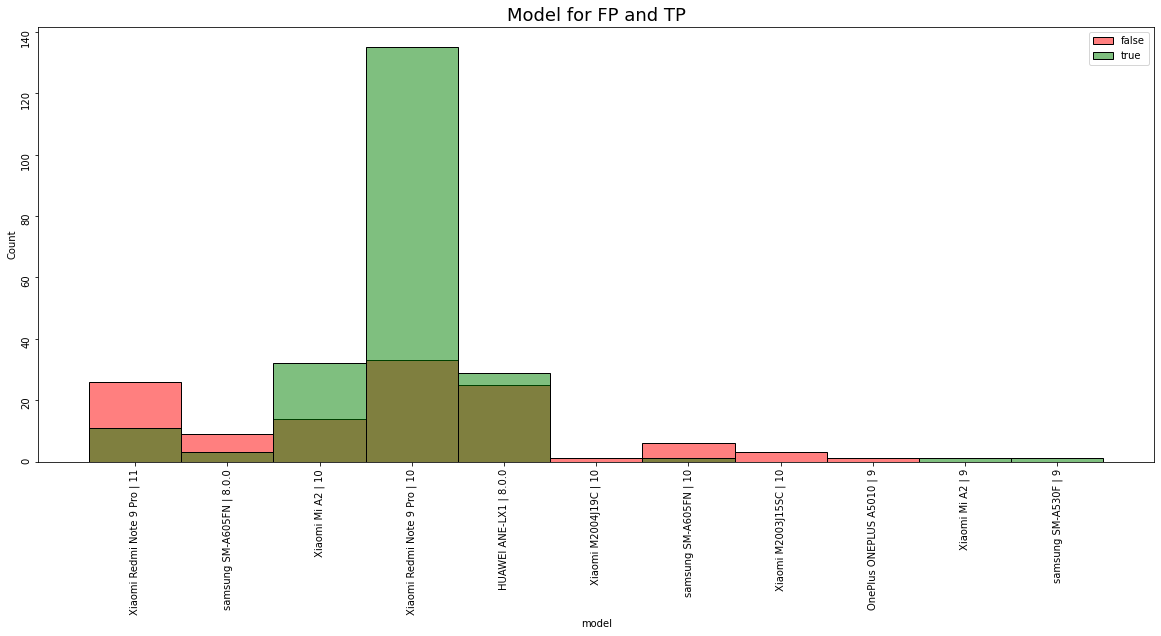

In [178]:
fig = plt.figure(figsize=(20, 8))

plt.title("Model for FP and TP", fontsize=18, y=1)

sns.histplot(false_pos['model'], alpha=0.5, color='r', label='false')
sns.histplot(true_pos['model'], alpha=0.5, color='g', label='true')

plt.legend()
plt.tick_params(rotation=90)
plt.show();

In [161]:
u_true_point, c_true_point = np.unique(true_pos['point'], return_counts=True)
u_false_point, c_false_point = np.unique(false_pos['point'], return_counts=True)

# Check which unique elements are common in both arrays
print('Models intersect in', np.intersect1d(u_true_point,u_false_point), 'counts are: ', c_true_point[np.intersect1d(u_true_point,u_false_point, return_indices=True)[1]])

Models intersect in ['chest01' 'chest02' 'chest03' 'chest04' 'spine01' 'spine02' 'spine03'
 'spine04' 'spine05' 'spine06'] counts are:  [28 30 22 30 24 25 16 26  9  3]


In [162]:
df1_point = pd.DataFrame(np.intersect1d(u_true_point,u_false_point), columns=['point'])
df2_point = pd.DataFrame(c_true_point[np.intersect1d(u_true_point,u_false_point, return_indices=True)[1]], columns=['count'])

In [163]:
df_point = pd.concat([df1_point, df2_point], axis=1)

In [164]:
print('these points are showing FP and TP')
df_point

these points are showing FP and TP


,point,count
0,chest01,28
1,chest02,30
2,chest03,22
3,chest04,30
4,spine01,24
5,spine02,25
6,spine03,16
7,spine04,26
8,spine05,9
9,spine06,3


In [166]:
diff_true_point = np.setdiff1d(u_true_point,u_false_point)
print('These models are only showing True' ,diff_true_point)

diff_false_point = np.setdiff1d(u_false_point, u_true_point)
print('These models are only showing False' ,diff_false_point)

These models are only showing True []
These models are only showing False []


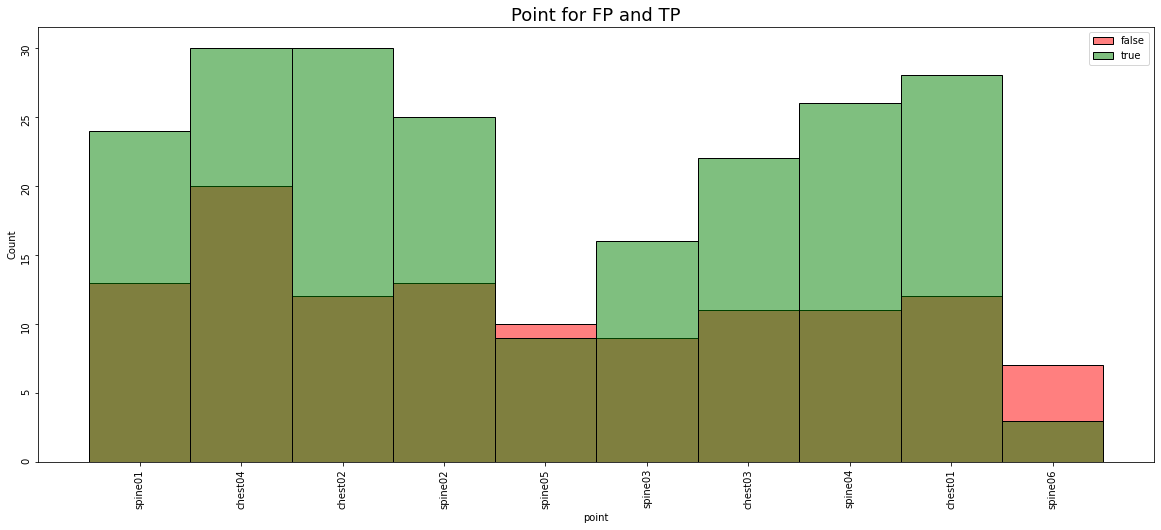

In [179]:
fig = plt.figure(figsize=(20, 8))

plt.title("Point for FP and TP", fontsize=18, y=1)

sns.histplot(false_pos['point'], alpha=0.5, color='r', label='false')
sns.histplot(true_pos['point'], alpha=0.5, color='g', label='true')

plt.legend()
plt.tick_params(rotation=90)
plt.show();